## Credit card fraud detection

### Importing Libraries

In [147]:
## import libray
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [148]:
## loading the data set to a pandas dataframe
df_test=pd.read_csv('fraudTest.csv')
df_train=pd.read_csv('fraudTrain.csv')

### Data Preprocessing

In [149]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [150]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [151]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [153]:
print(f"The shape of train set:{df_train.shape}\n")
print(f"Test set shape:{df_test.shape}")


The shape of train set:(1296675, 23)

Test set shape:(555719, 23)


In [154]:
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: []

Columns present in df_test set and absent in df_train: []


In [155]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [156]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Data Cleaning

In [157]:

def clean_data(clean):
     clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
     clean.dropna()
     return clean
     

In [158]:
clean_data(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [159]:
clean_data(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


### Data Analysis & Visualization

In [161]:
df_train['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

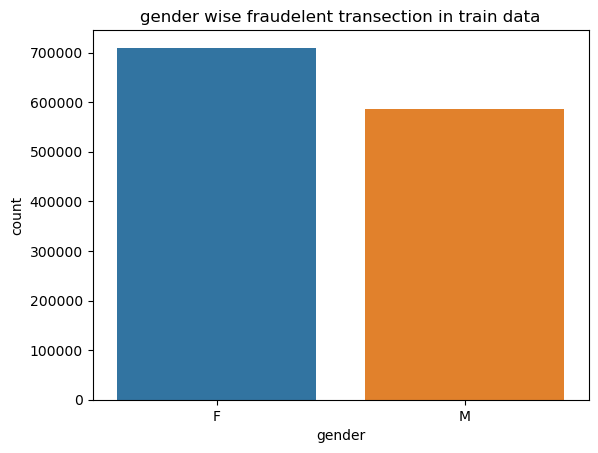

In [162]:
sns.countplot(x ='gender', data = df_train)
plt.title("gender wise fraudelent transection in train data")
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

In [163]:
df_test['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

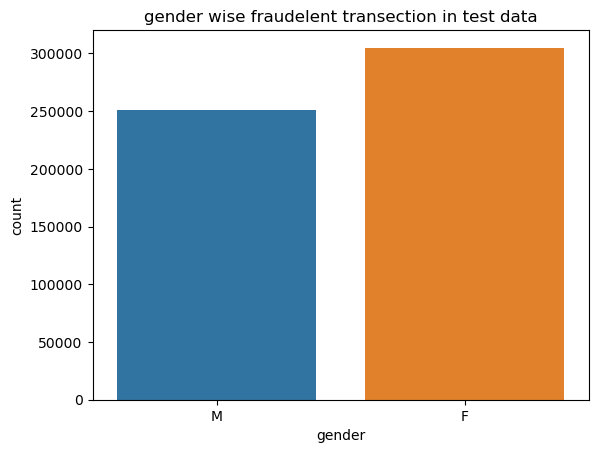

In [164]:
sns.countplot(x ='gender', data = df_test)
plt.title("gender wise fraudelent transection in test data")
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

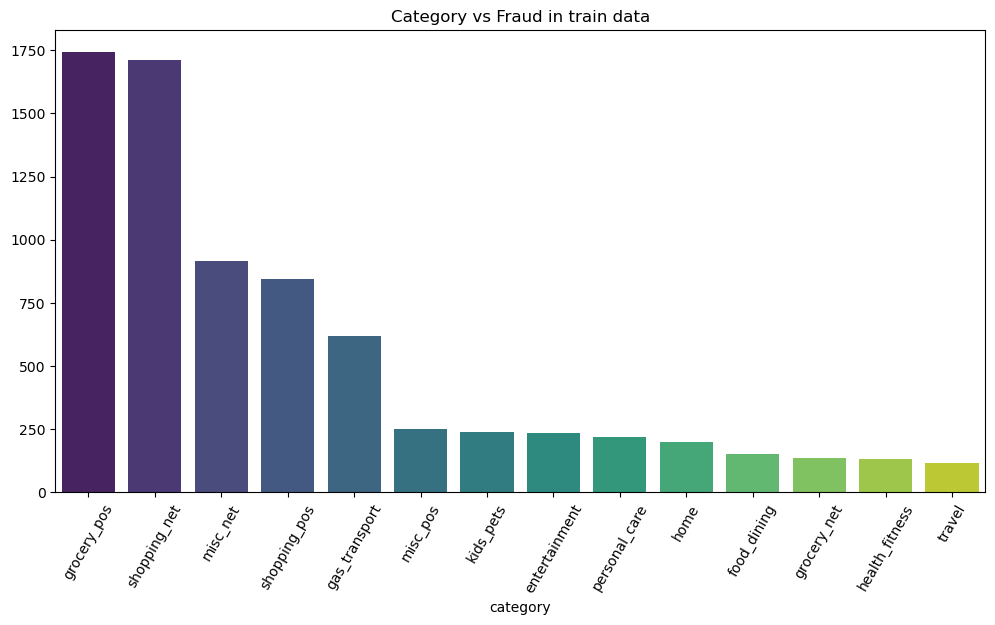

In [165]:
plt.figure(figsize = (12,6))
fraud_category = df_train[df_train["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud in train data")
plt.xticks(rotation = 60)
plt.show()


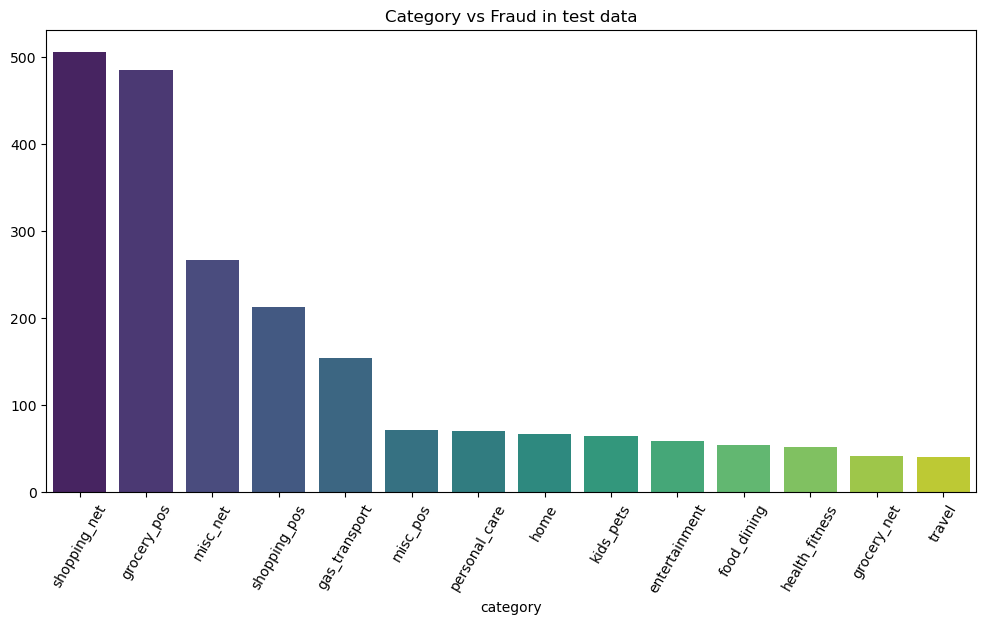

In [166]:
plt.figure(figsize = (12,6))
fraud_category = df_test[df_test["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud in test data")
plt.xticks(rotation = 60)
plt.show()

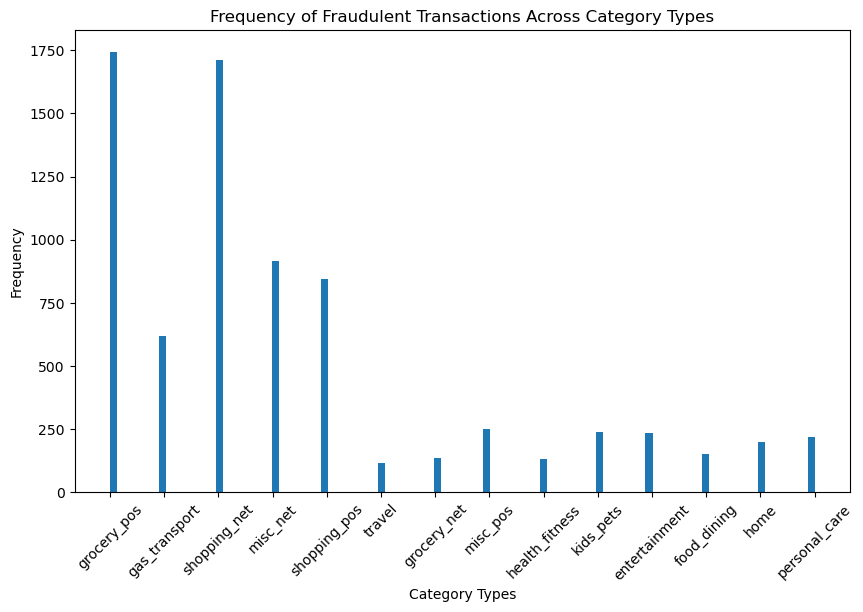

In [167]:
fraud_datatrain = df_train[df_train['is_fraud'] == 1]
data = fraud_datatrain['category']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

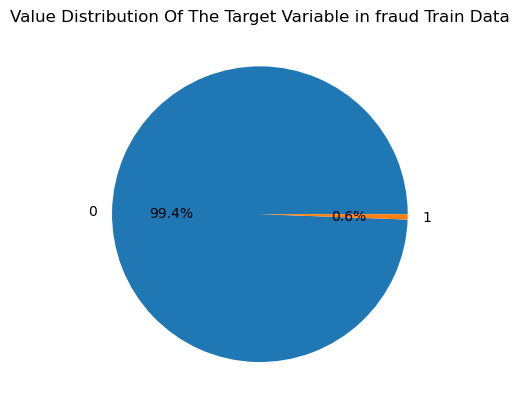

In [168]:
data = df_train['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Target Variable in fraud Train Data")
plt.show()

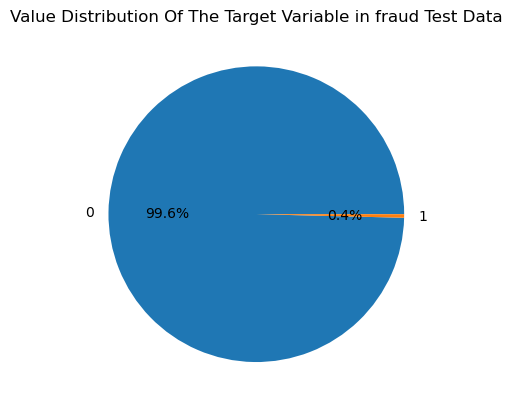

In [169]:
data = df_test['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Target Variable in fraud Test Data")
plt.show()

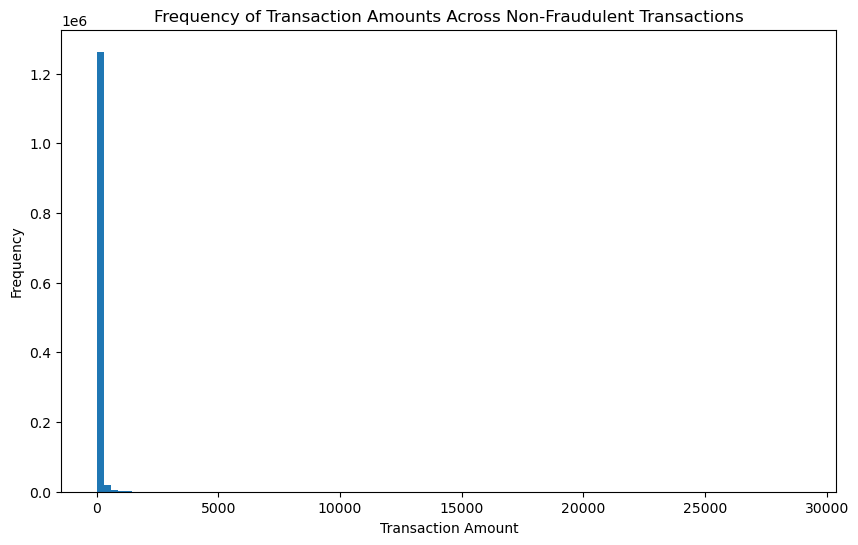

In [170]:
non_fraud_datatrain = df_train[df_train['is_fraud'] == 0]
data = non_fraud_datatrain['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#This graph shows that the vast majority of non-fraudulent transactions are clustered around small amounts,... 
#...close to 0. The frequency drops as the transaction amount increases.

### Feature selection

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# data preprocessing for Training Data
train_data = df_train[['gender', "category", "amt", "job", "is_fraud"]]

train_data.loc[:, 'category'] = le.fit_transform(train_data["category"])

train_data.loc[:, 'job'] = le.fit_transform(train_data["job"])
train_data.loc[:, 'gender'] = train_data["gender"].map({'M': 0, 'F': 1})

# data preprocessing for Testing Data
test_data = df_test[['gender',"category","amt", "job","is_fraud"]]

test_data.loc[:, 'category'] = le.fit_transform(test_data["category"])

test_data.loc[:, 'job'] = le.fit_transform(test_data["job"])
test_data.loc[:, 'gender'] = test_data["gender"].map({'M': 0, 'F': 1})

In [172]:
train_data.head(10)

,gender,category,amt,job,is_fraud
0,1,8,4.97,370,0
1,1,4,107.23,428,0
2,0,0,220.11,307,0
3,0,2,45.00,328,0
4,0,9,41.96,116,0
5,1,2,94.63,479,0
6,1,3,44.54,29,0
7,0,2,71.65,127,0
8,1,9,4.27,375,0
9,1,4,198.39,329,0


In [173]:
test_data.head(10)

,gender,category,amt,job,is_fraud
0,0,10,2.86,275,0
1,1,10,29.84,392,0
2,1,5,41.28,259,0
3,0,9,60.05,407,0
4,0,13,3.19,196,0
5,1,7,19.55,361,0
6,1,5,133.93,455,0
7,1,10,10.37,124,0
8,0,12,4.37,13,0
9,1,1,66.54,41,0


In [175]:
X_train = train_data[['gender', "category", "amt", "job"]]
Y_train = train_data["is_fraud"]

X_test = test_data[['gender', "category", "amt", "job"]]
Y_test = test_data["is_fraud"]

## Model Evaluation by logistic regression

In [178]:
lr_model = LogisticRegression(penalty="l1", solver="liblinear")
lr_model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [184]:
Y_pred = lr_model.predict(X_test)
accuracy1 = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy Score:", accuracy1)

Testing Accuracy Score: 0.9955049224518147


In [185]:
Y_pred = lr_model.predict(X_train)
accuracy2 = accuracy_score(Y_train, Y_pred)
print("Train Accuracy Score:", accuracy2)

Train Accuracy Score: 0.9936522258854378


### Model Evalution by Gaussian Naive Bayes

In [187]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
Y_pred_gnb = gnb_model.predict(X_test)
gnb_accuracy1 = accuracy_score(Y_test, Y_pred_gnb)
print("Testing Accuracy Score:", gnb_accuracy1)

Testing Accuracy Score: 0.9920841288492925


In [188]:
Y_pred_gnb = gnb_model.predict(X_train)
gnb_accuracy2 = accuracy_score(Y_train, Y_pred_gnb)
print("Training Accuracy Score:", gnb_accuracy2)

Training Accuracy Score: 0.990986176181387


### conclusion

In [186]:
print("model evalution with Logistic regression:\n")
print("Testing Accuracy Score:", accuracy1)
print("Train Accuracy Score:", accuracy2)

model evalution with Logistic regression:

Testing Accuracy Score: 0.9955049224518147
Train Accuracy Score: 0.9936522258854378


In [189]:
print("model evalution with Naive bayes:\n")
print("Testing Accuracy Score:", gnb_accuracy1)
print("Training Accuracy Score:", gnb_accuracy2)

model evalution with Naive bayes:

Testing Accuracy Score: 0.9920841288492925
Training Accuracy Score: 0.990986176181387
